In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("dataset.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
# 1. Plot Survived distribution 

df['Survived'].uniqueque()

array([0, 1], dtype=int64)

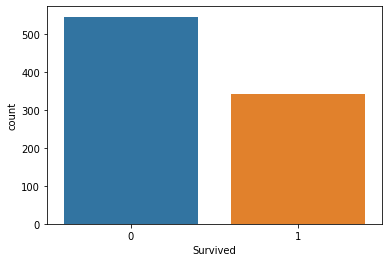

In [13]:
sns.countplot(df['Survived'])
plt.show()

In [6]:
# 2. plot Pclass distribution 
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

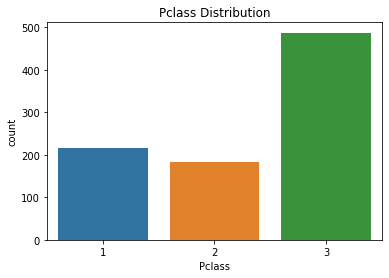

In [14]:
sns.countplot(df['Pclass'])
plt.title('Pclass Distribution')
plt.show()

In [16]:
# 3. create a new column 'Name_len' which holds string length 
df['Name_len'] = df['Name'].apply(lambda x: len(x) - len(' ')) # exclude white space or any special char
df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,21
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,49


In [18]:
# insert a new row to the existing dataframe
df=df.append({'Survived':0, 'Pclass':6,'Name':'ABC'}, ignore_index=True)
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
883,1,1,Miss. Margaret Edith Graham,female,19.0,0.0,0.0,30.00,26.0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1.0,2.0,23.45,29.0
885,1,1,Mr. Karl Howell Behr,male,26.0,0.0,0.0,30.00,19.0
886,0,3,Mr. Patrick Dooley,male,32.0,0.0,0.0,7.75,17.0
887,0,6,ABC,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Diversity')

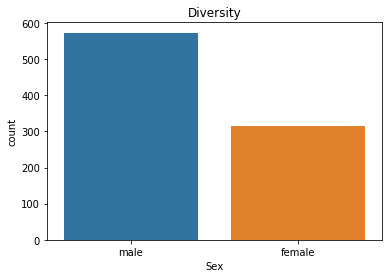

In [24]:
# 4. plot distribution for Sex 

# plt.figure(figsize=(16,4))
df['Sex'].unique()
sns.countplot(df['Sex'])
plt.title("Diversity")

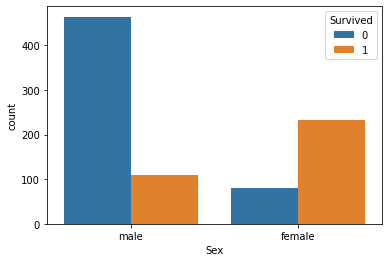

In [25]:
sns.countplot(df['Sex'], hue =df['Survived'])

In [27]:
fig, ax = plt.subplot(7,10)
sns.countplot(df['Sex'], ax = ax[0])
sns.countplot(df['Sex'], hue = df['Survived'], ax=ax[1])

ValueError: Illegal argument(s) to subplot: (7, 10)

<Figure size 432x288 with 0 Axes>

In [36]:
# 5. Replace male with 0 and female with 1 for Sex 
df['Sex_binary'] = df['Sex'].map({'female':1, 'male':0})
# df['Sex_binary'] = df['Sex_binary'].astype('int') # type casting
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Sex_binary
0,0,3,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500,21.0,0.0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833,49.0,1.0
2,1,3,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250,20.0,1.0


In [39]:
# 6. What is the percentage of male and female? 

print('% male: {} %'.format(round(len(df[df.Sex=='male'])/len(df)*100),2))
print('% female: {} %'.format(round(len(df[df.Sex=='female'])/len(df)*100),2))

% male: 65 %
% female: 35 %


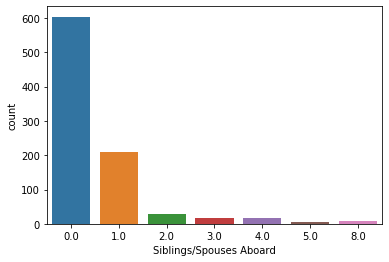

In [41]:
# 7. Plot Siblings/Spouses Aboard distribution 
sns.countplot(df['Siblings/Spouses Aboard'])

In [42]:
## finding count of NaN in the data
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        1
Age                        1
Siblings/Spouses Aboard    1
Parents/Children Aboard    1
Fare                       1
Name_len                   1
Sex_binary                 1
dtype: int64

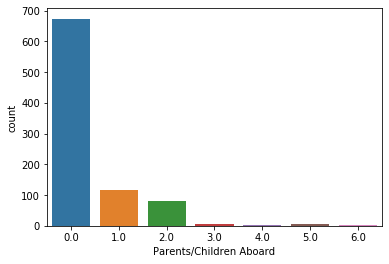

In [44]:
# 8. Plot Parents/Children Aboard distribution
sns.countplot(df['Parents/Children Aboard'])

In [46]:
df[df['Parents/Children Aboard']==2].shape[0]

80

<Figure size 1152x288 with 0 Axes>

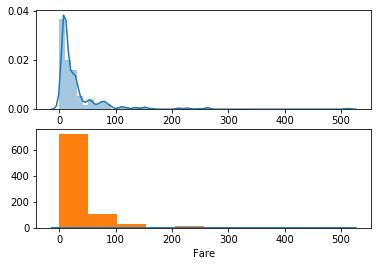

In [57]:
# 9. Plot Fare distribution 
# df.Fare.unique() 
plt.figure(figsize=(16,4))
df.fillna(0, inplace=True) ## replacing NaN woth '0'
fig, ax=plt.subplots(2,1)
sns.distplot(df['Fare'])
sns.distplot(df['Fare'], ax = ax[0])
ax[1].hist(df['Fare'])

plt.show()

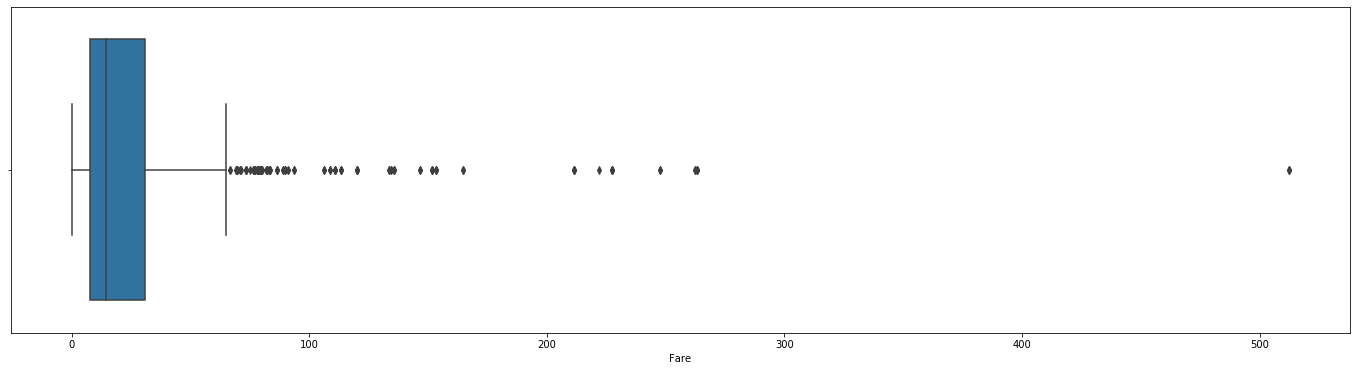

In [58]:
# 10. Highlight outliers in Fare if any 
plt.figure(figsize=(24,6))
sns.boxplot(df['Fare'])

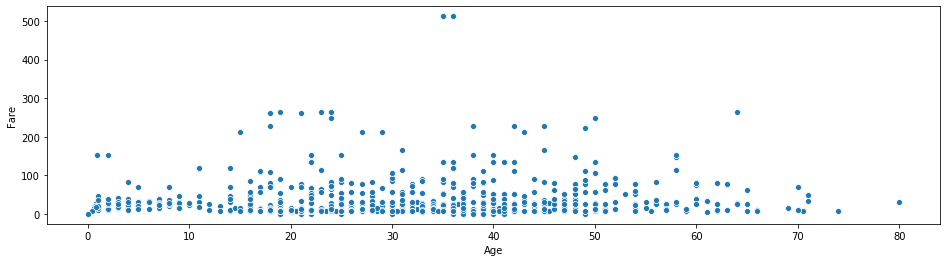

In [67]:
#scatter
plt.figure(figsize=(16,4))
sns.scatterplot('Age','Fare', data=df)

In [64]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Sex_binary
0,0,3,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500,21.0,0.0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833,49.0,1.0
2,1,3,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250,20.0,1.0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1000,42.0,1.0
4,0,3,Mr. William Henry Allen,male,35.0,0.0,0.0,8.0500,22.0,0.0


In [68]:
# 11. What is the ratio of survived and none-servived passengers? 

df[df.Survived==1].shape[0]/df[df.Survived==0].shape[0]

0.6263736263736264

In [70]:
# 12. what fraction of Pclass Survived? 
df[df.Survived==1].shape[0]/df.shape[0]

0.38513513513513514

In [71]:
1-df[df.Survived==1].shape[0]/df[df.Survived==0].shape[0]

0.37362637362637363